<a href="https://colab.research.google.com/github/SobiaNoorAI/ML-Projects/blob/main/Salary%20Prediction%20using%20ML/Code/data_preparation_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Steps of Pre_processing of Dataset
- Remove duplicates.
- Handle missing values.
- Normalize and scale numerical data.
- Detect and remove outliers using visualization and Z-score methods.
- Encode categorical variables for machine learning.

These preprocessing steps are essential for ensuring clean and reliable data for analysis or modeling!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Neccessary libraries

In [ ]:
# Import necessary libraries
import pandas as pd
from scipy import stats
#gnore all warnings, preventing them from being displayed during execution.
#It is commonly used to suppress non-critical warnings in Jupyter notebooks or scripts.
from warnings import filterwarnings
filterwarnings('ignore')

## 📁 Step 1: Load the Dataset

First, we'll load a sample dataset using Pandas and inspect the first few rows to understand its structure.


In [ ]:

# Load the dataset
file_path = '/content/drive/MyDrive/ML/L-2/sample_dataset_1000.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,ID,Name,Age,Gender,Salary,Joining Date,Is Active,Comments
0,1,Paul,25,Female,90041.86,2017-01-31,False,Creative
1,2,Paul,31,Male,90285.02,2019-05-29,False,Needs Improvement
2,3,Rachel,30,Male,84321.65,2022-12-14,False,Hardworking
3,4,Bob,45,Male,68189.99,2023-09-05,True,Fast Learner
4,5,Eve,34,Male,35428.35,2018-05-19,True,Dedicated


In [ ]:
df.tail()

,ID,Name,Age,Gender,Salary,Joining Date,Is Active,Comments
995,996,Jack,58,Male,34288.04,2020-01-18,True,Reliable
996,997,Jack,46,Other,97404.78,2023-11-22,True,Innovative
997,998,Kathy,53,Male,51242.03,2023-05-30,True,Enthusiastic
998,999,Mona,48,Other,34117.08,2017-08-15,True,Motivated
999,1000,Rachel,45,Female,43198.50,2015-12-02,True,Dedicated


In [ ]:
df.dtypes

,0
ID,int64
Name,object
Age,int64
Gender,object
Salary,float64
Joining Date,object
Is Active,bool
Comments,object


## 🧽 Step 2: Remove Duplicate Rows

Duplicate rows in a dataset can lead to biased analysis. Let's remove any duplicate rows to ensure our data is clean.


In [ ]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Display the cleaned dataset
df_cleaned.head()

,ID,Name,Age,Gender,Salary,Joining Date,Is Active,Comments
0,1,Paul,25,Female,90041.86,2017-01-31,False,Creative
1,2,Paul,31,Male,90285.02,2019-05-29,False,Needs Improvement
2,3,Rachel,30,Male,84321.65,2022-12-14,False,Hardworking
3,4,Bob,45,Male,68189.99,2023-09-05,True,Fast Learner
4,5,Eve,34,Male,35428.35,2018-05-19,True,Dedicated


##  Step 3: Handle Missing Values

Missing values can cause errors or inaccuracies in analysis. We can either fill missing values with appropriate substitutes (e.g., mean) or remove rows with missing data.


In [ ]:
# Check for remaining missing values
df_cleaned.isnull().sum()

# This dataset has currently no missing values

,0
ID,0
Name,0
Age,0
Gender,0
Salary,0
Joining Date,0
Is Active,0
Comments,0


In [ ]:
# If we have missing values we can use this following common method to Fill missing values with column mean
# inplace=true modifies the DataFrame directly without creating a new copy.
#In this code, it fills missing values in the "Age" column with the column's mean and updates df_cleaned in place.
df_cleaned['Age'].fillna(df_cleaned['Age'].mean(), inplace=True)
df_cleaned['Salary'].fillna(df_cleaned['Salary'].mean(), inplace=True)

# Now check again for missing values
df_cleaned.isnull().sum()

,0
ID,0
Name,0
Age,0
Gender,0
Salary,0
Joining Date,0
Is Active,0
Comments,0


In [ ]:
df.shape

(1000, 8)

## Step 4: Normalize and Scale the Data

In data preprocessing, **Normalization** and **Scaling** are key techniques to ensure that numerical features are on a similar scale, which can improve the performance of machine learning models, particularly those that rely on distance metrics or assume normally distributed data.

- **Normalization** transforms features to fall within a specific range, often between 0 and 1. This ensures that all features contribute equally to the model’s performance. We’ll use MinMaxScaler to perform this transformation on our data.

- **Scaling** refers to adjusting the values of numeric columns so that they fit within a particular range or distribution. A common method is to scale the data so that it has a **mean of 0** and a **standard deviation of 1** (this is called **standardization**). In other cases, scaling can bring the data into a specific range, like **0 to 1** (this is often done with **MinMaxScaler**).


In this step, we'll apply **MinMaxScaler** to scale the data between 0 and 1, bringing all numerical features to a common range to improve model efficiency and accuracy.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to 'Age' and 'Salary'
df_cleaned[['Age', 'Salary']] = scaler.fit_transform(df_cleaned[['Age', 'Salary']])

# Show scaled data
df_cleaned[['Age', 'Salary']].head()


,Age,Salary
0,0.125,0.667930
1,0.275,0.670636
2,0.250,0.604271
3,0.625,0.424746
4,0.350,0.060150


### Scaling

In [ ]:
#This scales the values to have mean = 0 and standard deviation = 1 for better distribution.
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply normalization
df_cleaned[['Age', 'Salary']] = scaler.fit_transform(df_cleaned[['Age', 'Salary']])

# Show normalized data
df_cleaned[['Age', 'Salary']].head()


,Age,Salary
0,-1.353353,0.580768
1,-0.843392,0.590183
2,-0.928385,0.359284
3,0.346519,-0.265329
4,-0.588411,-1.533850


##  Step 8: Encode Categorical Variables (Optional)

In machine learning, most algorithms require **numerical inputs** to perform computations. Categorical variables, such as 'Gender', 'Color', or 'Country', are typically non-numeric and need to be converted into a format that machine learning models can process. This process is known as **encoding**.

In this step, we'll use **Label Encoding** to convert categorical variables into numeric form. Label Encoding assigns a unique integer to each category in a feature. For example, the 'Gender' column with values like 'Male' and 'Female' can be encoded as 0 and 1, respectively. This allows the model to handle the data more effectively.

- **Label Encoding**: This method is appropriate when the categorical variables . For non-ordinal variables, encoding could introduce an unintended hierarchy. If the variable is nominal (like 'Gender'), you can consider alternatives like **One-Hot Encoding**, which avoids such issues by representing each category as a separate binary feature.

In this case, we'll apply Label Encoding to transform the 'Gender' variable into numerical format.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Gender' column
le = LabelEncoder()
df_cleaned['Gender_Encoded'] = le.fit_transform(df_cleaned['Gender'])

# Display encoded gender column
df_cleaned[['Gender', 'Gender_Encoded']].head()

,Gender,Gender_Encoded
0,Female,0
1,Male,1
2,Male,1
3,Male,1
4,Male,1


# One-Hot Encoding

In [ ]:
import pandas as pd

# Apply one-hot encoding to all categorical columns
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned["Is Active"] = df_cleaned['Is Active'].astype(int)


# Display updated DataFrame
print(df_cleaned.head())



   ID       Age    Salary  Is Active  Gender_Encoded  Name_Bob  Name_Charlie  \
0   1 -1.353353  0.580768          0               0     False         False   
1   2 -0.843392  0.590183          0               1     False         False   
2   3 -0.928385  0.359284          0               1     False         False   
3   4  0.346519 -0.265329          1               1      True         False   
4   5 -0.588411 -1.533850          1               1     False         False   

   Name_David  Name_Eve  Name_Frank  ...  Comments_Great Team Player  \
0       False     False       False  ...                       False   
1       False     False       False  ...                       False   
2       False     False       False  ...                       False   
3       False     False       False  ...                       False   
4       False      True       False  ...                       False   

   Comments_Hardworking  Comments_Innovative  Comments_Logical  \
0                 Fa

## Step 5: Detect Outliers Using Visualization

Outliers are data points that are much different from the rest of the data. They can be extreme values that stand out. To find these outliers, we’ll use **boxplots**.

### What is a Boxplot?
A **boxplot** is a graph that shows how data is spread out. It highlights the **median**, **quartiles** (the middle 50% of the data), and potential outliers. The "whiskers" of the boxplot extend from the quartiles, and any data point outside of these whiskers is considered an **outlier**.

By looking at a boxplot, we can quickly spot values that are unusually high or low compared to the rest of the data.

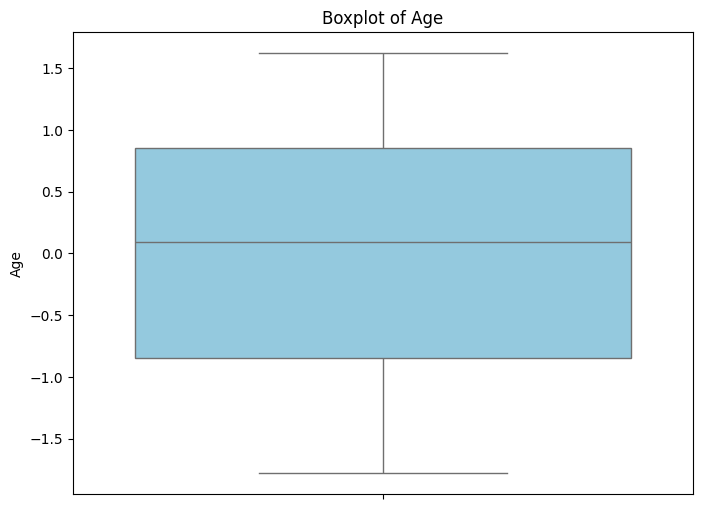

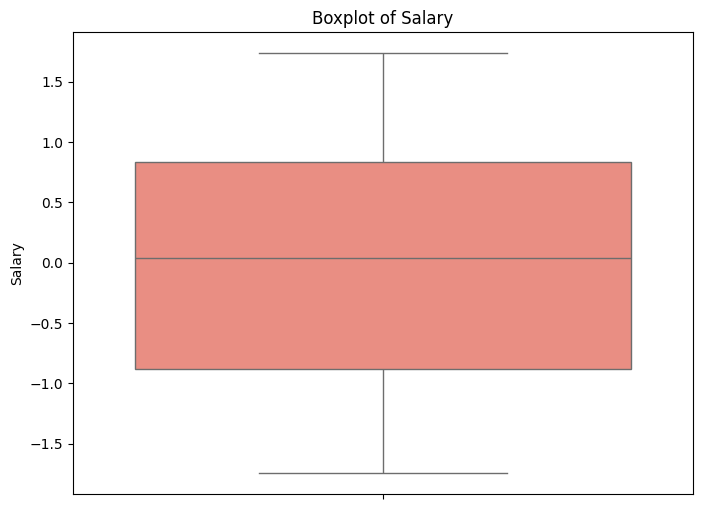

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize 'Age' column for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned['Age'], color='skyblue')
plt.title('Boxplot of Age')
plt.show()

# Visualize 'Salary' column for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned['Salary'], color='salmon')
plt.title('Boxplot of Salary')
plt.show()

##  Step 6: Detect Outliers Using Z-Score Method

The **Z-score method** helps us find outliers by measuring how far each value is from the average (mean) in terms of standard deviations. A Z-score tells us how many standard deviations a value is away from the mean.

- If a Z-score is greater than **3**, the value is considered an **outlier** because it's far from the mean.
  
In this step, we’ll use the Z-score method to identify which data points are unusually far from the average and might be outliers.

In [ ]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for 'Age' and 'Salary'
z_scores = np.abs(zscore(df_cleaned[['Age', 'Salary']]))

# Identify rows with Z-scores > 3 (outliers)
outliers = (z_scores > 3).any(axis=1)

# Remove outliers from the dataset
df_no_outliers = df_cleaned[~outliers]

# Display cleaned dataset without outliers
df_no_outliers.head()

,ID,Age,Salary,Is Active,Gender_Encoded,Name_Bob,Name_Charlie,Name_David,Name_Eve,Name_Frank,...,Comments_Great Team Player,Comments_Hardworking,Comments_Innovative,Comments_Logical,Comments_Motivated,Comments_Needs Improvement,Comments_Passionate,Comments_Punctual,Comments_Reliable,Comments_Versatile
0,1,-1.353353,0.580768,False,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,-0.843392,0.590183,False,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,3,-0.928385,0.359284,False,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,4,0.346519,-0.265329,True,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,-0.588411,-1.533850,True,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


##  Step 7: Visualize Data After Removing Outliers

Let's re-plot boxplots to confirm that outliers have been removed.


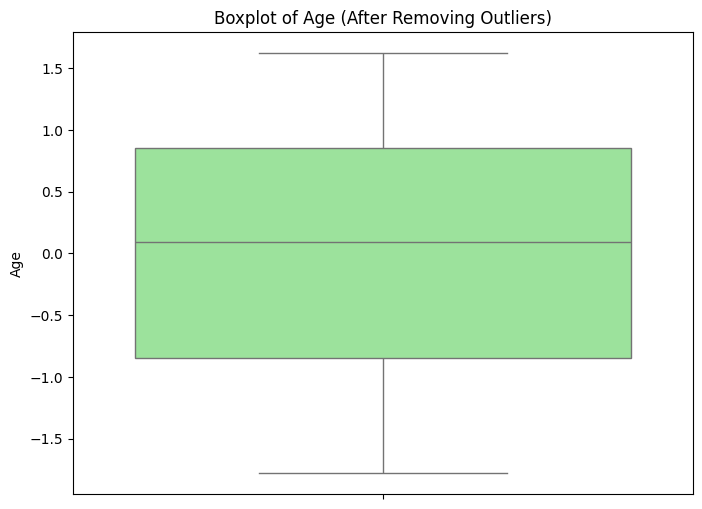

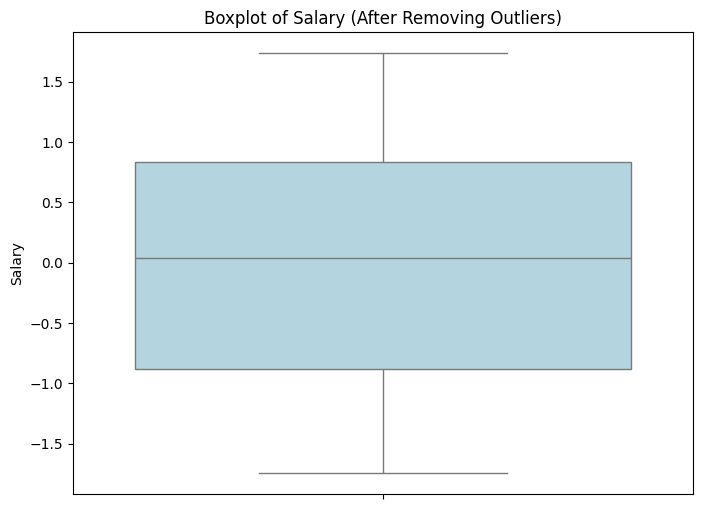

In [ ]:
# Boxplot after removing outliers (Age)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers['Age'], color='lightgreen')
plt.title('Boxplot of Age (After Removing Outliers)')
plt.show()

# Boxplot after removing outliers (Salary)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers['Salary'], color='lightblue')
plt.title('Boxplot of Salary (After Removing Outliers)')
plt.show()

##  Final Thoughts

In this notebook, we learned how to:

- Remove duplicates.
- Handle missing values.
- Normalize and scale numerical data.
- Detect and remove outliers using visualization and Z-score methods.
- Encode categorical variables for machine learning.

These preprocessing steps are essential for ensuring clean and reliable data for analysis or modeling!
